<a href="https://colab.research.google.com/github/mrsferret/Machine-Learning-ITNPBD6-/blob/main/ExerciseSession2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Splitting Your Data
In this exercise, we'll load the same motor premiums data as you did in your last exercise with Python.

In practice, what should happen is to do data cleaning after splitting training/test data. The reasoning behind this is that any data cleaning is part of the pipeline: it can influence the model accuracy too. Once you've decided the cleaning steps, you'd then (possibly) apply them to test data too. More discussion on this will follow in later weeks.

Here we'll look at how we can split the data into train/validation/test sets and how to use cross-fold validation. Cleaning steps are added after the train/test split.

(remember, click on a cell, then control+enter will run it)

In [ ]:
import pandas as pd
import numpy as np

# load the data...
# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("MotorPremiums.csv")
print(df.head())

          ID  Age Gender LicenceCountry  Yrs DL  Points  NCD  Engine cc  \
0  B69193007   52      M             UK      16       0    0       1200   
1  B58763002   46      F             UK      22       8    1       1400   
2  A57010377   59      F             UK       9       0    0       1400   
3  B61470950   62      M             UK      35       0    0       1400   
4  B43586226   59      F             UK       3       0    4       1400   

   Ins Group  Stored  Car Age  Premium  
0          4  Garage        2   195.32  
1          2  Garage        7   225.09  
2          5  Garage       14   201.08  
3          4       0       12   211.76  
4          5    Road       13   251.49  


# Train / Test split
If you've also completed this exercise in Orange, we're now replicating what we did with Data Sampler.

First, we separate into X (the input features) and y (the target).

Then splitting is really easy! We use train_test_split(); test_size is the fraction of the data that will form your test set; random_state initialises the random number generator so if you rerun it the split will be the same (change the number for a different split).

In [ ]:
# set features and targets
targetName="Premium"
#===================================================================
# Split the data into 2 separate files ie. target and features
#===================================================================
# df.columns != targetName creates a boolean array where each element is True if the corresponding column name is not equal to
# targetName ("Premium"), and False otherwise.
# df.columns[df.columns != targetName] uses this boolean array to filter out the column names that are not equal to targetName.
# This results in an Index object containing only the names of the feature columns.
allFeatureNames=df.columns[df.columns != targetName]
X = df[allFeatureNames]
y = df[targetName]
print(X.head())
print(y.head())

          ID  Age Gender LicenceCountry  Yrs DL  Points  NCD  Engine cc  \
0  B69193007   52      M             UK      16       0    0       1200   
1  B58763002   46      F             UK      22       8    1       1400   
2  A57010377   59      F             UK       9       0    0       1400   
3  B61470950   62      M             UK      35       0    0       1400   
4  B43586226   59      F             UK       3       0    4       1400   

   Ins Group  Stored  Car Age  
0          4  Garage        2  
1          2  Garage        7  
2          5  Garage       14  
3          4       0       12  
4          5    Road       13  
0    195.32
1    225.09
2    201.08
3    211.76
4    251.49
Name: Premium, dtype: float64


In [ ]:
# Split the data into training and testing sets:

# train_test_split(X, y, test_size=0.2, random_state=402):
# X: The feature matrix.
# y: The target vector.
# test_size=0.2: Specifies the proportion of the dataset to include in the test split. Here, 20% of the data
# will be used for testing, and the remaining 80% will be used for training.
# random_state=402: Sets the seed for the random number generator. This ensures that the split is reproducible,
# meaning the same split will be obtained every time you run the code with this seed.

# random_state=402: Sets the seed for the random number generator. This ensures that the split is reproducible,
# meaning the same split will be obtained every time you run the code with this seed.
# test_size=0.2 means that 20% of the data will be used to testing and 80% for training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=402)

We have now split the data, at random, into two sets. X_train and y_train are the training data, and should contain 3509 data points.

In [ ]:
X_train

,ID,Age,Gender,LicenceCountry,Yrs DL,Points,NCD,Engine cc,Ins Group,Stored,Car Age
3942,B11376082,35,M,UK,7,4,1,1200,4,Road,15
519,B39004071,53,M,UK,35,0,3,1200,3,Garage,1
2165,B520403,55,M,UK,16,0,3,1200,3,Garage,3
2171,A51648972,61,M,UK,39,0,4,1400,6,Garage,3
1135,B45810673,18,F,UK,1,0,3,1200,4,Garage,1
...,...,...,...,...,...,...,...,...,...,...,...
2469,A36517462,50,M,UK,11,0,0,1400,6,Garage,10
1807,A65813411,36,F,UK,12,0,2,1200,2,Road,1
2014,A96543980,75,F,UK,12,0,1,1800,3,Garage,1
1226,B66545713,78,M,UK,48,0,1,1400,3,Road,1


In [ ]:
y_train

3942    239.28
519     227.10
2165    222.74
2171    250.71
1135    189.86
         ...  
2469    204.59
1807    216.04
2014    199.35
1226    233.49
389     214.76
Name: Premium, Length: 3509, dtype: float64

We repeat the same process to produce a validation set as well...

In [ ]:
# we now further split X_train and y_train randomly to produce a validation set X_validation and y_validation

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

We now have X_train, X_validation, and X_test, with the "y_" equivalents. We now start to develop our pipeline. For now, that means we do the same data cleaning we did in week 1...

This code snippet is performing data cleaning and preprocessing on the training dataset for a machine learning model. Let's break down each part of the code step by step:

### Step-by-Step Explanaon - from chatGon

#### 1. Filtering the Rows

```python
# choose the rows we want to keep
# ie. where LicenceCountry = "UK" and Stored not 0
X_train_cleaned = X_train[(X_train.LicenceCountry=="UK") & (X_train.Stored!="0")]
y_train_cleaned = y_train[(X_train.LicenceCountry=="UK") & (X_train.Stored!="0")] # remove the same rows from the target
```

- **Filtering Criteria**: The code selects rows where the `LicenceCountry` column is "UK" and the `Stored` column is not "0".
- **`X_train_cleaned`**: This DataFrame contains the filtered rows of `X_train`.
- **`y_train_cleaned`**: This Series contains the corresponding rows of `y_train` that match the filtering criteria applied to `X_train`.

#### 2. Resetting the Index

```python
# this is needed so the row numbers are still in sequence
X_train_cleaned = X_train_cleaned.reset_index(drop=True)
y_train_cleaned = y_train_cleaned.reset_index(drop=True)
```

- **Purpose**: After filtering, the index might not be in sequence. `reset_index(drop=True)` resets the index of both `X_train_cleaned` and `y_train_cleaned` to ensure the row numbers are sequential and drop the old index.

#### 3. Selecting Specific Features

```python
# define the list of features to keep
selected_features = ['Age','Gender','Yrs DL','Points','NCD','Engine cc',
                     'Ins Group','Stored','Car Age']

# update the data frame
X_train_cleaned = X_train_cleaned[selected_features]
```

- **`selected_features`**: A list of column names that are to be kept in the cleaned dataset.
- **Updating `X_train_cleaned`**: The DataFrame `X_train_cleaned` is updated to only include the columns specified in `selected_features`.

#### 4. Mapping Values in the 'Gender' Column

```python
# Map 'Female' and 'Male' F and M
X_train_cleaned['Gender'] = X_train_cleaned['Gender'].replace({'Female':'F','Male':'M'})
```

- **Purpose**: This line replaces the values in the `Gender` column. "Female" is replaced with "F" and "Male" is replaced with "M".

### Summary

1. **Filtering Data**: The code filters rows in `X_train` where `LicenceCountry` is "UK" and `Stored` is not "0". Corresponding rows in `y_train` are also filtered.
2. **Resetting Index**: The index of the filtered DataFrames `X_train_cleaned` and `y_train_cleaned` is reset to ensure sequential row numbers.
3. **Selecting Features**: Only specific columns (features) are retained in `X_train_cleaned`.
4. **Mapping Values**: The `Gender` column values are mapped from "Female" to "F" and "Male" to "M".

This preprocessing step is crucial to prepare the dataset for training a machine learning model by ensuring the data is clean, relevant, and in a consistent format.

In [ ]:
# choose the rows we want to keep
# ie. where LicenceCountry = "UK" and Stored not 0
X_train_cleaned = X_train[(X_train.LicenceCountry=="UK") & (X_train.Stored!="0")]
y_train_cleaned = y_train[(X_train.LicenceCountry=="UK") & (X_train.Stored!="0")] # remove the same rows from the target

# this is needed so the row numbers are still in sequence
X_train_cleaned = X_train_cleaned.reset_index(drop=True)
y_train_cleaned = y_train_cleaned.reset_index(drop=True)

# define the list of features to keep
selected_features = ['Age','Gender','Yrs DL','Points','NCD','Engine cc',
                     'Ins Group','Stored','Car Age']

# update the data frame
X_train_cleaned = X_train_cleaned[selected_features]

# Map 'Female' and 'Male' F and M
X_train_cleaned['Gender'] = X_train_cleaned['Gender'].replace({'Female':'F','Male':'M'})

Now, encode the categorical variables.

This happens automatically in Orange: the models will only accept numbers as inputs, so we need to "encode" categorical variables, converting them into numbers. We used get_dummies() to do this last time, but now we're working on train/test sets separately we will want to be able to create the same columns on both; for that we'll use the OneHotEncoder that comes with sklearn. Doing it this way lets us remember the columns from the training set to use on the test set (or in deployment) later.

This code demonstrates how to use the `OneHotEncoder` from the `sklearn.preprocessing` module to encode categorical variables into a format suitable for machine learning algorithms. Let's go through the steps:

### Step-by-Step Explanation - from chatGPT

#### 1. Importing the Necessary Modules

```python
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
```
- **`asarray`**: This function from the NumPy library converts the input into an array.
- **`OneHotEncoder`**: This class from scikit-learn is used for converting categorical data into a one-hot encoded format.

#### 2. Creating the Example List

```python
# example_list = asarray([['apple'], ['orange'], ['pear'], ['apple']])
```

- **Example List**: A NumPy array is created with a list of categorical values (fruits in this case): "apple", "orange", "pear", and "apple" again.

#### 3. Instantiating the OneHotEncoder

```python
# make a new OneHotEncoder to do the work for us...
# ("sparse" makes the output more condensed for efficiency, but harder to read, so we'll disable that)
enc = OneHotEncoder(sparse=False)
```

- **OneHotEncoder Object**: An instance of `OneHotEncoder` is created with `sparse=False`.
  - **`sparse_output=False`**: This ensures that the output will be a dense array, which is easier to read for demonstration purposes. If `sparse_output=True`, the output will be a sparse matrix which is more memory efficient.

#### 4. Fitting the Encoder

```python
# fit() works out which columns to make and stores them in "enc"
enc.fit(example_list)
```

- **`fit` Method**: This method analyzes the input data (`example_list`) and determines the unique categories within it. It then prepares the encoder to transform the data into a one-hot encoded format.
  - **Storing Columns**: The `fit` method identifies unique categories ("apple", "orange", and "pear") and prepares to create one-hot encoded columns for each category.

### Summary

Here's a quick summary of what the code does:

1. **Import Modules**: Import `asarray` from NumPy and `OneHotEncoder` from scikit-learn.
2. **Create Example List**: Define a list of categorical values (fruits) and convert it into a NumPy array.
3. **Instantiate OneHotEncoder**: Create an instance of `OneHotEncoder` with `sparse=False` to get a dense output.
4. **Fit the Encoder**: Use the `fit` method on the `example_list` to learn the unique categories and prepare for one-hot encoding.

### What is One-Hot Encoding?

One-hot encoding is a process of converting categorical variables into a binary matrix representation. Each category becomes a column, and rows have binary values (0 or 1) indicating the presence of each category. For example:

- Original Data: `[['apple'], ['orange'], ['pear'], ['apple']]`
- One-Hot Encoded Data:
  ```
  [[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1],
   [1, 0, 0]]
  ```

In this encoding, each unique category gets its own column. For example, "apple" is represented as `[1, 0, 0]`, "orange" as `[0, 1, 0]`, and "pear" as `[0, 0, 1]`.

In [ ]:
# As an example of how OneHotEncoder works, here is a list of values for a categorical variable:
# (this is actually a grid/table, with only one column)
# example of a dummy variable encoding
from numpy import asarray
#data = asarray([['red'], ['green'], ['blue']])
example_list = asarray([['apple'], ['orange'], ['pear'], ['apple']])

# make a new OneHotEncoder to do the work for us...
# ("sparse" makes the output more condensed for efficiency, but harder to read, so we'll disable that)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)

# fit() works out which columns to make and stores them in "enc"
enc.fit(example_list)

OneHotEncoder(sparse_output=False)

In [ ]:
# transform() then makes those columns in the data set we provide
transformed_data = enc.transform(example_list)

# you should see four rows, corresponding to the four data points in the original example_list
# there are three columns, one for each of apple/orange/pear
# each row has a 1 to show which fruit was in that position in the list
print(transformed_data)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


At the same time, we can normalise the numerical variables to the range 0..1 using a MinMaxScaler, which is used in a similar way. These two processing steps can be combined into one processing routine using ColumnTransformer...

In [ ]:
# First, determine categorical and numerical features
# we can do that automatically looking for the column data types like this:
numerical_ix = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X_train_cleaned.select_dtypes(include=['object', 'bool']).columns

# this now contains the names of the numerical variables:
numerical_ix

Index(['Age', 'Yrs DL', 'Points', 'NCD', 'Engine cc', 'Ins Group', 'Car Age'], dtype='object')

In [ ]:
# ...and similar for the categorical:
categorical_ix

Index(['Gender', 'Stored'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# define the data preparation for the columns
#
# categorical columns will have a one hot encoder applied
#   (note - we also set this to drop the first "dummy" column, similer to what we did last week; we have also
#    told it how to handle unknown values, those that don't appear in the training data but do appear in validation
#    or testing. 'infrequent_if_exist' assigns any unknown values to a separate category)
#
# numerical columns will be normalised
#
# each processing step also includes the list of columns that it will be applied to
t = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

print(t)


# fit() works out which columns to make and stores them in "enc"
col_transform.fit(X_train_cleaned)

# transform() then makes those columns in the data set we provide
X_train_encoded = col_transform.transform(X_train_cleaned)

# X_train_encoded will now be a numpy array, which can be used for training
# the columns in this are the raw data
print(X_train_encoded)

[('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), Index(['Gender', 'Stored'], dtype='object')), ('num', MinMaxScaler(), Index(['Age', 'Yrs DL', 'Points', 'NCD', 'Engine cc', 'Ins Group', 'Car Age'], dtype='object'))]
[[0.         0.         1.         ... 0.         0.66666667 0.        ]
 [1.         1.         0.         ... 0.         0.66666667 0.26315789]
 [0.         1.         0.         ... 0.07692308 0.33333333 0.        ]
 ...
 [0.         1.         0.         ... 0.         0.66666667 0.05263158]
 [1.         0.         1.         ... 0.07692308 0.16666667 0.        ]
 [1.         0.         1.         ... 0.         0.5        0.        ]]


We can then use the training data to train a model and use that model for doing predictions, like this:

In [ ]:
# make a new model - MLPRegressor is an artificial neural network
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(10), alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, max_iter=1000, random_state=1)

print(mlp_model)

# train the model on (or fit the model to) our training data
mlp_model.fit(X_train_encoded, y_train_cleaned)

MLPRegressor(alpha=0.001, hidden_layer_sizes=10, learning_rate_init=0.01,
             max_iter=1000, random_state=1)


MLPRegressor(alpha=0.001, hidden_layer_sizes=10, learning_rate_init=0.01,
             max_iter=1000, random_state=1)

Well done, you've just made your first model in scikit learn! We can now apply this model to unseen data to make some predictions. We'll use the validation set we separated out above for this.

In [ ]:
# first, apply the same column transformations to the validation data...
X_validation_transformed = col_transform.transform(X_validation)

18.69373788890384


Text(0, 0.5, 'Predictions')

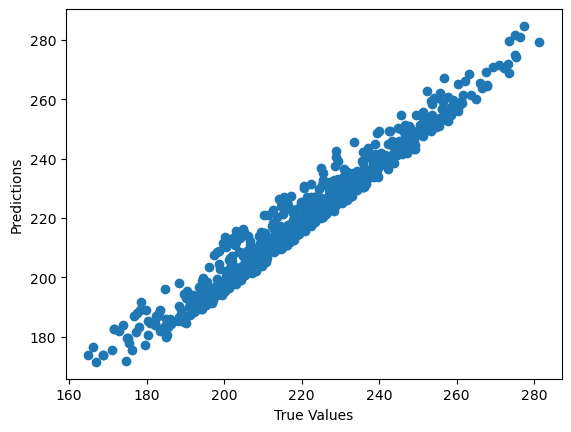

In [ ]:
# make some predictions using the model
# store the predictions in y_pred
y_pred = mlp_model.predict(X_validation_transformed)

# how do the predictions compare to the true values?
# print mean square error
from sklearn import metrics
print(metrics.mean_squared_error(y_validation, y_pred))

# and a scatter plot
from matplotlib import pyplot as plt
plt.scatter(y_validation, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Cross-fold validation
As in Orange, sklearn makes it easy to do cross-fold validation. By default, the built-in tool for this calls the `score` function of the model to measure model quality on each fold; `score()` works differently per model but the documentation will tell you that for an `MLPRegressor` it's the R^2 value, which would be 1.0 for a perfect model. If you want to use a different measure like mean square error you can specify which one you want from the list [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

Here's how to perform the cross-fold validation, using 5 folds of our training set. We get a list of scores back in which each element is the score for one fold. We usually aggregate these (e.g. take the average) to get one overall score. You'll see the scores are negative: this is deliberate, and is so a "bigger" score (smaller error) is "better".

In [ ]:
# we'll reuse our training data from before. In practice we'd skip the extra split to training/validation sets.

# compute scores for the 5 folds...
# remember, this makes 5 seperate models, and tests them each on a different 0.2 of the data set.
# the scores for these tests are returned in a list.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mlp_model, X_train_encoded, y_train_cleaned, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(scores.mean())

[-19.30991429 -18.63603471 -20.86669768 -21.72356501 -20.18491094]
-20.144224523434428


To interpret the results of the cross-validation, let's break down the output and what it signifies:

### Output
```
[-19.30991429 -18.63603471 -20.86669768 -21.72356501 -20.18491094]
-20.144224523434428
```

### Interpretation

1. **Scores for Each Fold:**
   ```python
   [-19.30991429 -18.63603471 -20.86669768 -21.72356501 -20.18491094]
   ```
   - These values represent the negative mean squared error (MSE) for each of the 5 folds in the cross-validation process.
   - The values are negative because we used `neg_mean_squared_error` as the scoring metric. This function returns the negative of the MSE values.

2. **Understanding Each Fold's Score:**
   - **-19.30991429**: The negative MSE for the first fold.
   - **-18.63603471**: The negative MSE for the second fold.
   - **-20.86669768**: The negative MSE for the third fold.
   - **-21.72356501**: The negative MSE for the fourth fold.
   - **-20.18491094**: The negative MSE for the fifth fold.

3. **Mean Score:**
   ```python
   -20.144224523434428
   ```
   - This value represents the average negative mean squared error across all 5 folds.
   - To interpret it in terms of actual MSE, you take the negative of this mean score: `20.144224523434428`.

### Good or Bad?
- **Magnitude of MSE**:
  - The actual MSE values (after taking the negative) are quite large (around 20). Whether these scores are good or bad depends on the context of your problem and the scale of your target variable.
  - For instance, if the target values in your dataset range from 0 to 100, an MSE of 20 might indicate a considerable error. However, if the target values range from 0 to 1000, an MSE of 20 might be acceptable.

- **Consistency**:
  - The MSE values across the folds are relatively consistent, ranging from approximately 18.6 to 21.7. This consistency indicates that the model's performance is stable across different subsets of the data.

### Contextual Factors to Consider
- **Target Variable Scale**: If your target variable (in `y_train_cleaned`) has a wide range, then the MSE might need to be evaluated in that context. For example, if the target values are in the thousands, an MSE around 20 might be quite good.
- **Baseline Comparison**: Compare these results to a baseline model (like a simple mean predictor) to determine if your model provides a significant improvement.
- **Domain Expertise**: Leverage domain knowledge to judge if the prediction errors are within an acceptable range for practical use.

### Next Steps
- **Model Tuning**: If the MSE is considered high, you might want to tune your model's hyperparameters further.
- **Feature Engineering**: Consider improving the feature set by adding new features or removing less relevant ones.
- **Different Models**: Try different models to see if they can achieve a lower MSE.

By carefully analyzing the cross-validation scores in the context of your specific problem, you can better understand the model's performance and determine the next steps for improvement.

We'll see later that many of the tools in sklearn use cross-fold validation internally, so you don't need to do the separate steps as above. However, it's good to know that this is what's going on behind the scenes.

You can load, train and test other models in much the same way as MLPRegressor. They all have `fit()` and `predict()` functions, and can all be supplied to cross_val_score.

Try comparing a few other model types. Browse the [documentation](https://scikit-learn.org/stable/supervised_learning.html) for regression models: don't worry specifically which you choose, as we've not given any detail on these yet, but `sklearn.linear_model.LinearRegression` and `sklearn.ensemble.RandomForestRegressor` are good places to start. Which one performs best on this data?

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

m1 = RandomForestRegressor()
m2 = LinearRegression()
# ...

scores = cross_val_score(m1, X_train_encoded, y_train_cleaned, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(scores.mean())

scores = cross_val_score(m2, X_train_encoded, y_train_cleaned, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(scores.mean())

[-18.20392508 -15.55852264 -14.98403196 -17.90668237 -18.33371611]
-16.997375632892886
[-19.28467425 -18.59132314 -20.84440275 -21.72625717 -20.14640706]
-20.11861287615306


Comment: Looks like the RandomForestRegressor is the best model.

Finally, we retrain the model that did best in cross validation on all the training data (not just one fold) then apply the best model to the original, unseen test data.

The test set will need the same column transformations applied, but we can choose whether any additional cleaning is needed (e.g. outliers can affect the training so we remove them there, but we might still want to see if the final model can cope with them). Here we don't do any cleaning on the test data.

In [ ]:
# Put the best model you found here...
final_model = RandomForestRegressor()
final_model.fit(X_train_encoded, y_train_cleaned)

X_test_transformed = col_transform.transform(X_test)

y_pred = final_model.predict(X_test_transformed)

# how do the predictions compare to the true values?
# print mean square error
from sklearn import metrics
print(metrics.mean_squared_error(y_pred, y_test))

# is this error better or worse than the scores you've seen above? Often it will be worse (a bigger value) because
# the test data is unseen but sometimes, as is the case here, we'll be lucky and it'll be better.

15.571123727904327


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Code Explanation

```python
# Put the best model you found here...
final_model = RandomForestRegressor()
```
1. **Model Selection**:
   - The `RandomForestRegressor` from the `sklearn.ensemble` module is chosen as the final model. This is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting.

```python
final_model.fit(X_train_encoded, y_train_cleaned)
```
2. **Model Training**:
   - The `fit` method is used to train the `RandomForestRegressor` on the encoded training data (`X_train_encoded`) and the cleaned training targets (`y_train_cleaned`). This step builds the random forest model based on the provided data.

```python
X_test_transformed = col_transform.transform(X_test)
```
3. **Transforming Test Data**:
   - The `ColumnTransformer` (`col_transform`) used earlier to encode the training data is now applied to the test data (`X_test`). This ensures that the test data undergoes the same preprocessing steps (e.g., one-hot encoding for categorical features and scaling for numerical features) as the training data.

```python
y_pred = final_model.predict(X_test_transformed)
```
4. **Model Prediction**:
   - The trained `RandomForestRegressor` model is used to make predictions on the transformed test data (`X_test_transformed`). The predicted values are stored in `y_pred`.

```python
# how do the predictions compare to the true values?
# print mean square error
from sklearn import metrics
print(metrics.mean_squared_error(y_pred, y_test))
```
5. **Evaluation**:
   - The mean squared error (MSE) of the predictions is calculated using `metrics.mean_squared_error` from `sklearn`. This function compares the predicted values (`y_pred`) to the actual target values (`y_test`), which were not transformed.
   - The MSE is a common metric for evaluating regression models. It measures the average squared difference between the predicted values and the actual values, indicating how close the predictions are to the true values. A lower MSE indicates better model performance.
  
### Detailed Example

Let"'"s illustrate this with a simple example

1. **Model Initialization and Training**:
   ```python
   from sklearn.ensemble import RandomForestRegressor
   
   # Initialize the model
   final_model = RandomForestRegressor()
   
   # Fit the model on the training data
   final_model.fit(X_train_encoded, y_train_cleaned)
   ```
   Here, the `RandomForestRegressor` is being trained on the encoded features and corresponding target values.
2. **Transform Test Data**:
   ```python
   # Transform the test data using the same column transformer
   X_test_transformed = col_transform.transform(X_test)
   ```
   This ensures that the test data is processed in the same way as the training data, maintaining consistency in the feature representation.

3. **Model Prediction**:
   ```python
   # Predict on the transformed test data
   y_pred = final_model.predict(X_test_transformed)
   ```
   The model uses the learned patterns to predict the target values for the test data.

4. **Evaluate Model Performance**:
   ```python
   from sklearn import metrics
   
   # Calculate the mean squared error
   mse = metrics.mean_squared_error(y_pred, y_test)
   print(mse)
   ```
   The MSE is calculated to quantify the error between the predicted and actual values. This helps in assessing how well the model performs on unseen data.

### Interpretation of MSE

- **Good Model Performance**: If the MSE is low, it means that the model"'"s predictions are close to the actual values, indicating good performance.
- **Poor Model Performance**: If the MSE is high, it suggests that there is a significant difference between the predicted and actual values, indicating that the model may not be performing well.

To determine if the MSE value is good or bad, it should be compared to a baseline model or other models trained on the same data. Additionally, the scale of the target variable plays a crucial role in interpreting the MSE.
